In [1]:
import numpy as np
import matplotlib.pyplot as plt

from SpecFunctions import *
from HamiltonianFunctions import *
from PointChargeFunctions import *

def gen_oh(x0):
    iontest = np.asarray([[x0,0,0,-2],
                     [-x0,0,0,-2],
                     [0,x0,0,-2],
                     [0,-x0,0,-2],
                     [0,0,x0,-2],
                     [0,0,-x0,-2]
                     ])
    return iontest

def gen_dist_oh(x0,z0):
    iontest = np.asarray([[x0,0,0,-2],
                     [-x0,0,0,-2],
                     [0,x0,0,-2],
                     [0,-x0,0,-2],
                     [0,0,z0,-2],
                     [0,0,-z0,-2]
                     ])
    return iontest

In [2]:
# look at the effect of changing the Er-X distance uniformly

so_gs = StevensOperators(15/2)
so_es = StevensOperators(13/2)
sc = SpectrumCalculator()
pc = PointCharge()

xpos = 1e-10*np.linspace(1.6,2.7,501)

param_list_x = [pc.calc_cf_params(gen_oh(x0)) for x0 in xpos]

spec_dict = {'Linear':np.zeros((1000,xpos.size)),'RHC':np.zeros((1000,xpos.size)),
             'LHC':np.zeros((1000,xpos.size))}

for k, dict_it in enumerate(param_list_x):
    ham_gs = so_gs.build_ham(dict_it)
    gs_ev_dict = so_gs.proc_ham(ham_gs)
    ham_es = so_es.build_ham(dict_it)
    es_ev_dict = so_es.proc_ham(ham_es)
    #
    freq_ax,temp_spec = sc.calc_spectrum(gs_ev_dict,es_ev_dict,
                                      Spectrum='Excitation',Temperature=5.0,Polarization='Linear',z1y1=6200)
    temp_spec_con = sc.convolve_spectrum(freq_ax,temp_spec,2.)
    spec_dict['Linear'][:,k] = temp_spec_con
    #
    _,temp_spec = sc.calc_spectrum(gs_ev_dict,es_ev_dict,
                                      Spectrum='Excitation',Temperature=5.0,Polarization='RHC',z1y1=6200)
    temp_spec_con = sc.convolve_spectrum(freq_ax,temp_spec,2.)
    spec_dict['RHC'][:,k] = temp_spec_con
    #
    _,temp_spec = sc.calc_spectrum(gs_ev_dict,es_ev_dict,
                                      Spectrum='Excitation',Temperature=5.0,Polarization='LHC',z1y1=6200)
    temp_spec_con = sc.convolve_spectrum(freq_ax,temp_spec,2.)
    spec_dict['LHC'][:,k] = temp_spec_con


<IPython.core.display.Javascript object>


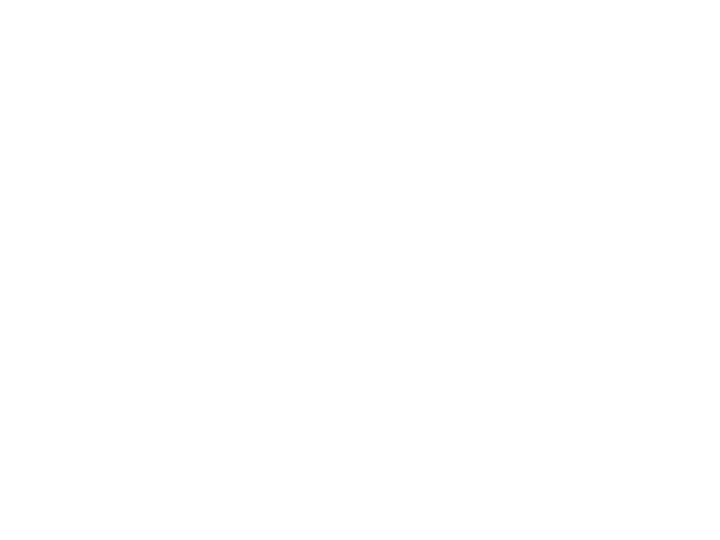

In [3]:
%matplotlib notebook

plt.figure()
plt.contourf(freq_ax,xpos,spec_dict['Linear'].T
             +spec_dict['RHC'].T
             +spec_dict['LHC'].T,40)
plt.show()

In [4]:
# look at the effect of distorting an Oh along a C4 axis - elongating the axial pair
%matplotlib notebook

so_gs = StevensOperators(15/2)
so_es = StevensOperators(13/2)
sc = SpectrumCalculator()
pc = PointCharge()

zpos = 1e-10*np.linspace(1.5,3.0,501)
x0 = 1.8e-10

param_list_x = [pc.calc_cf_params(gen_dist_oh(x0,z0)) for z0 in zpos]

spec_dict = {'Linear':np.zeros((1000,zpos.size)),'RHC':np.zeros((1000,zpos.size)),
             'LHC':np.zeros((1000,zpos.size))}

for k, dict_it in enumerate(param_list_x):
    ham_gs = so_gs.build_ham(dict_it)
    gs_ev_dict = so_gs.proc_ham(ham_gs)
    ham_es = so_es.build_ham(dict_it)
    es_ev_dict = so_es.proc_ham(ham_es)
    #
    freq_ax,temp_spec = sc.calc_spectrum(gs_ev_dict,es_ev_dict,
                                      Spectrum='Excitation',Temperature=5.0,Polarization='Linear',z1y1=6200)
    temp_spec_con = sc.convolve_spectrum(freq_ax,temp_spec,2.)
    spec_dict['Linear'][:,k] = temp_spec_con
    #
    _,temp_spec = sc.calc_spectrum(gs_ev_dict,es_ev_dict,
                                      Spectrum='Excitation',Temperature=5.0,Polarization='RHC',z1y1=6200)
    temp_spec_con = sc.convolve_spectrum(freq_ax,temp_spec,2.)
    spec_dict['RHC'][:,k] = temp_spec_con
    #
    _,temp_spec = sc.calc_spectrum(gs_ev_dict,es_ev_dict,
                                      Spectrum='Excitation',Temperature=5.0,Polarization='LHC',z1y1=6200)
    temp_spec_con = sc.convolve_spectrum(freq_ax,temp_spec,2.)
    spec_dict['LHC'][:,k] = temp_spec_con

<IPython.core.display.Javascript object>


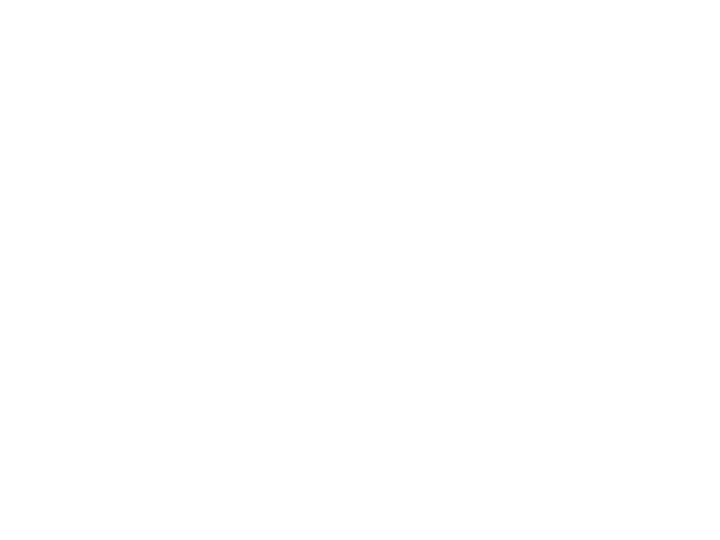

In [5]:
%matplotlib notebook

plt.figure()
plt.contourf(freq_ax,zpos-x0,spec_dict['Linear'].T
             +spec_dict['RHC'].T
             +spec_dict['LHC'].T,40)
plt.show()

In [6]:
# look at the effect of distorting an Oh along a C4 axis - elongating the equatorial four
%matplotlib notebook

so_gs = StevensOperators(15/2)
so_es = StevensOperators(13/2)
sc = SpectrumCalculator()
pc = PointCharge()

xpos = 1e-10*np.linspace(1.5,3.0,501)
z0 = 1.8e-10

param_list_x = [pc.calc_cf_params(gen_dist_oh(x0,z0)) for x0 in xpos]

spec_dict = {'Linear':np.zeros((1000,xpos.size)),'RHC':np.zeros((1000,xpos.size)),
             'LHC':np.zeros((1000,xpos.size))}

for k, dict_it in enumerate(param_list_x):
    ham_gs = so_gs.build_ham(dict_it)
    gs_ev_dict = so_gs.proc_ham(ham_gs)
    ham_es = so_es.build_ham(dict_it)
    es_ev_dict = so_es.proc_ham(ham_es)
    #
    freq_ax,temp_spec = sc.calc_spectrum(gs_ev_dict,es_ev_dict,
                                      Spectrum='Excitation',Temperature=5.0,Polarization='Linear',z1y1=6200)
    temp_spec_con = sc.convolve_spectrum(freq_ax,temp_spec,2.)
    spec_dict['Linear'][:,k] = temp_spec_con
    #
    _,temp_spec = sc.calc_spectrum(gs_ev_dict,es_ev_dict,
                                      Spectrum='Excitation',Temperature=5.0,Polarization='RHC',z1y1=6200)
    temp_spec_con = sc.convolve_spectrum(freq_ax,temp_spec,2.)
    spec_dict['RHC'][:,k] = temp_spec_con
    #
    _,temp_spec = sc.calc_spectrum(gs_ev_dict,es_ev_dict,
                                      Spectrum='Excitation',Temperature=5.0,Polarization='LHC',z1y1=6200)
    temp_spec_con = sc.convolve_spectrum(freq_ax,temp_spec,2.)
    spec_dict['LHC'][:,k] = temp_spec_con

<IPython.core.display.Javascript object>


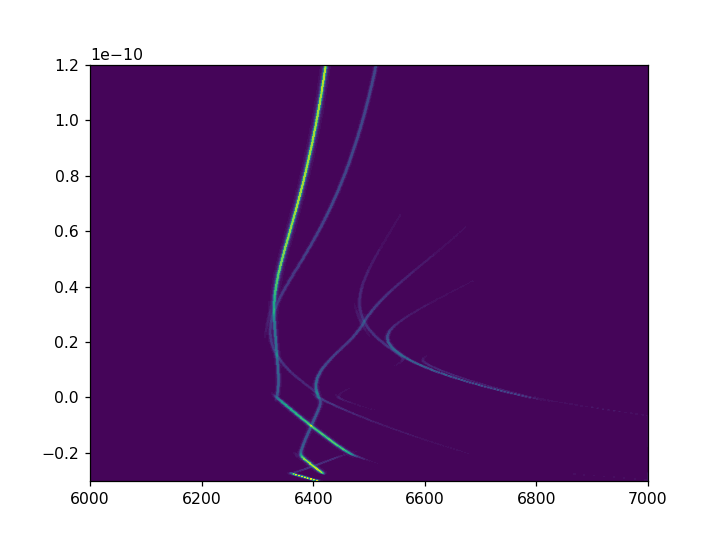

In [7]:
%matplotlib notebook

plt.figure()
plt.contourf(freq_ax,zpos-x0,spec_dict['Linear'].T
             +spec_dict['RHC'].T
             +spec_dict['LHC'].T,40)
plt.show()